In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import theano as th
import theano.tensor as tt
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb
import g3py as g3
import pymc3 as pm

#g3.style_seaborn()
#g3.style_normal()
g3.style_big()
#g3.style_big_seaborn()
g3.style_widget()


th.config.NanGuardMode.big_is_error = False
#th.config.mode = 'DebugMode'
#th.config.mode = 'FAST_RUN'
th.config.exception_verbosity = 'high'

# Data

In [2]:
x, y = g3.load_sunspots()
# x, y = g3.load_co2()

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



In [3]:
obs_j, x_obs, y_obs, test_j, x_test, y_test = g3.random_obs(x, y, 0.15)

Total: 309 | Obs: 46 (14.88673139158576%)


{'TGP_Bias_Constant': array(0.0, dtype=float32),
 'TGP_Noise_Var_log_': array(0.0, dtype=float32),
 'TGP_SE_ARD_L2_Scales_log_': array(0.0, dtype=float32),
 'TGP_SE_Var_log_': array(0.0, dtype=float32),
 'TGP_WN_Var_log_': array(0.0, dtype=float32)}

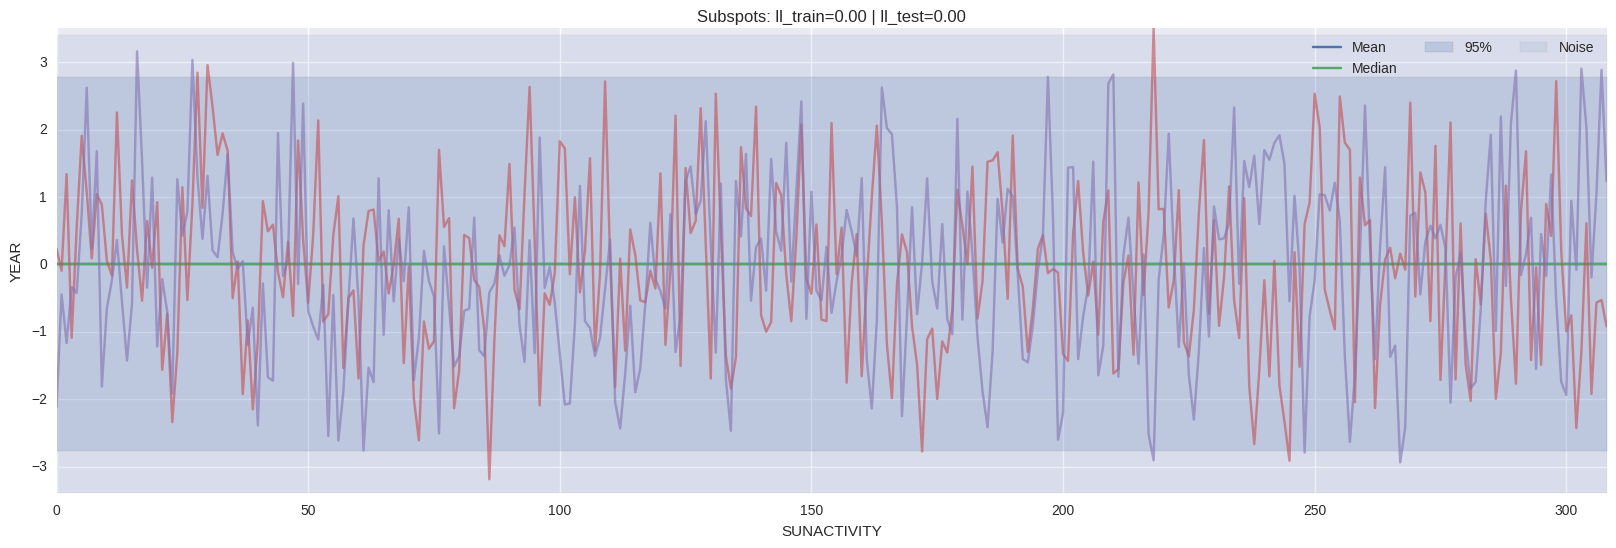

In [55]:
with g3.Model() as model:
    tgp = g3.TGP(x, g3.Bias(), g3.SE(x_obs), g3.Identity(y_obs), noise=True)
    tgp.describe('Subspots','SUNACTIVITY','YEAR')
    #tgp.observed(x_obs,y_obs)
    tgp.testing(x_test,y_test)
    tgp.compile()
    
tgp.plot_tgp(tgp.find_default(), samples=2)
tgp.find_default()

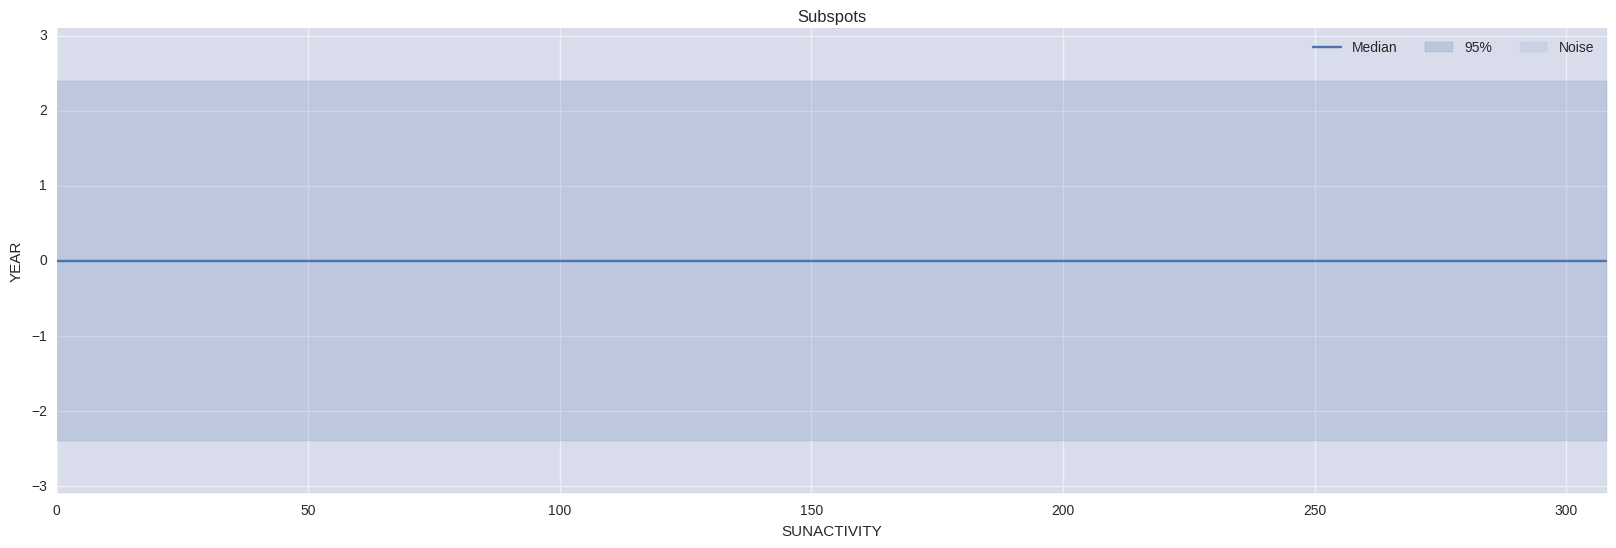

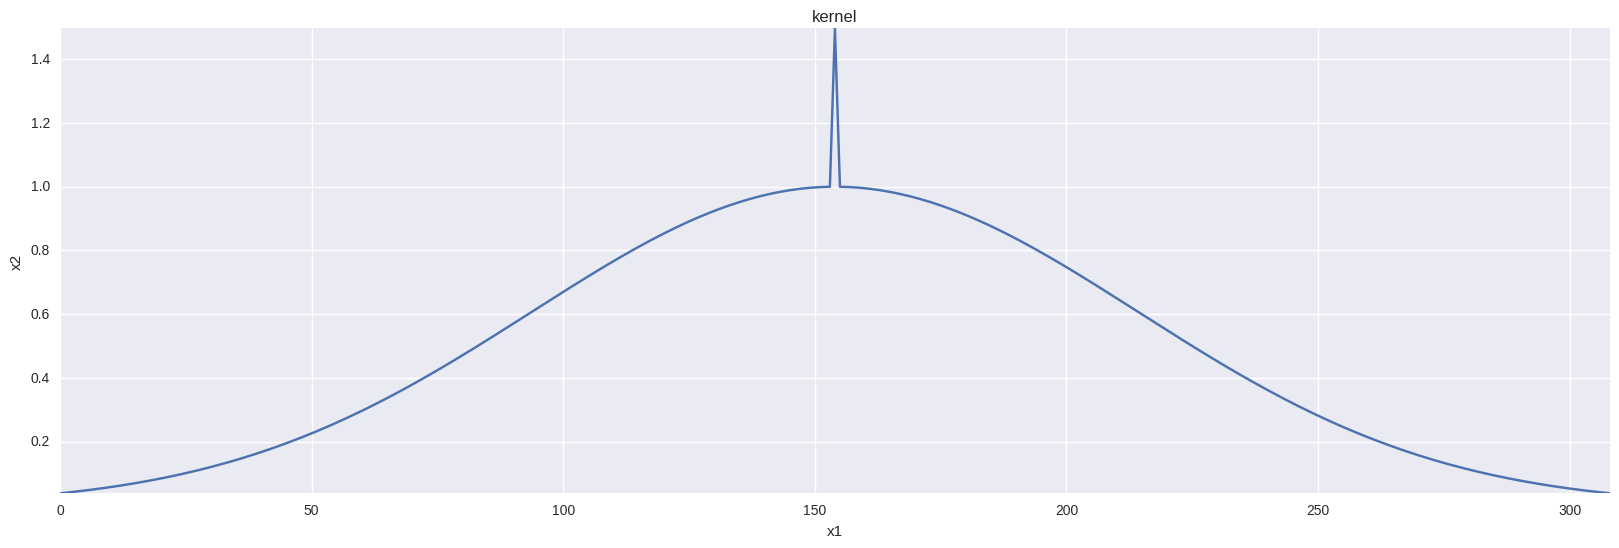

In [56]:
tgp.widget_params(tgp.find_default())

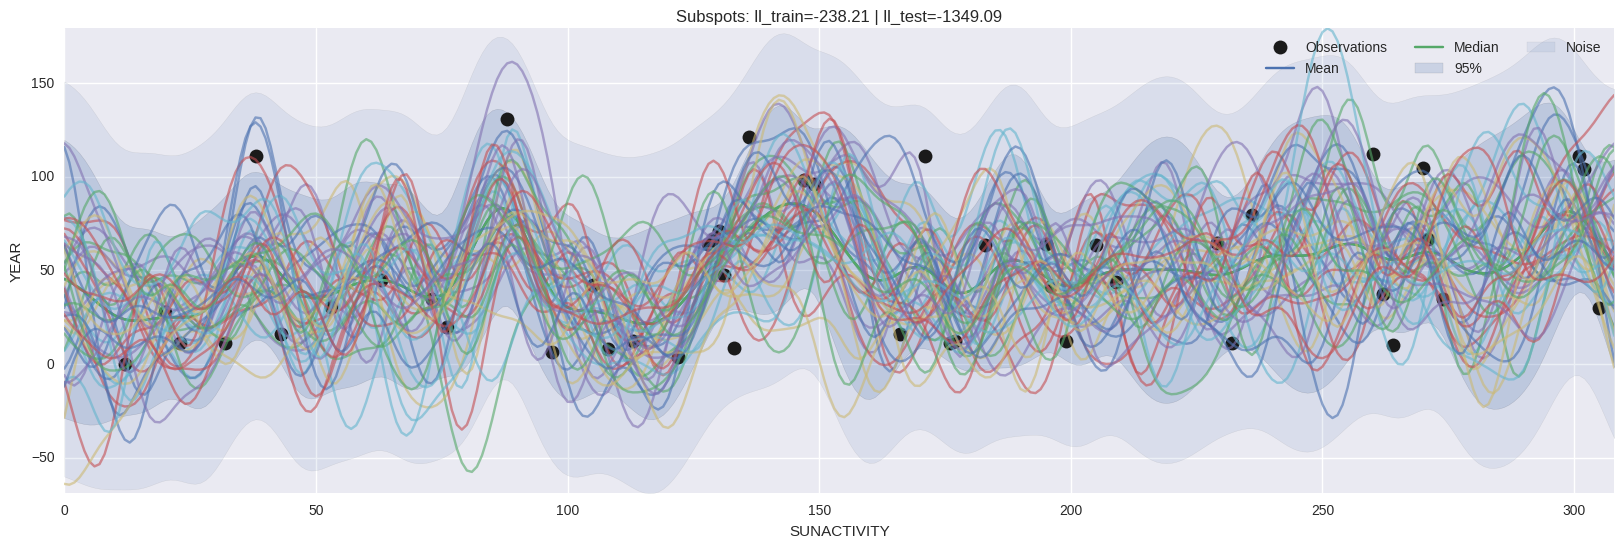

In [51]:
tgp.plot_tgp(tgp.get_params(), samples=50)

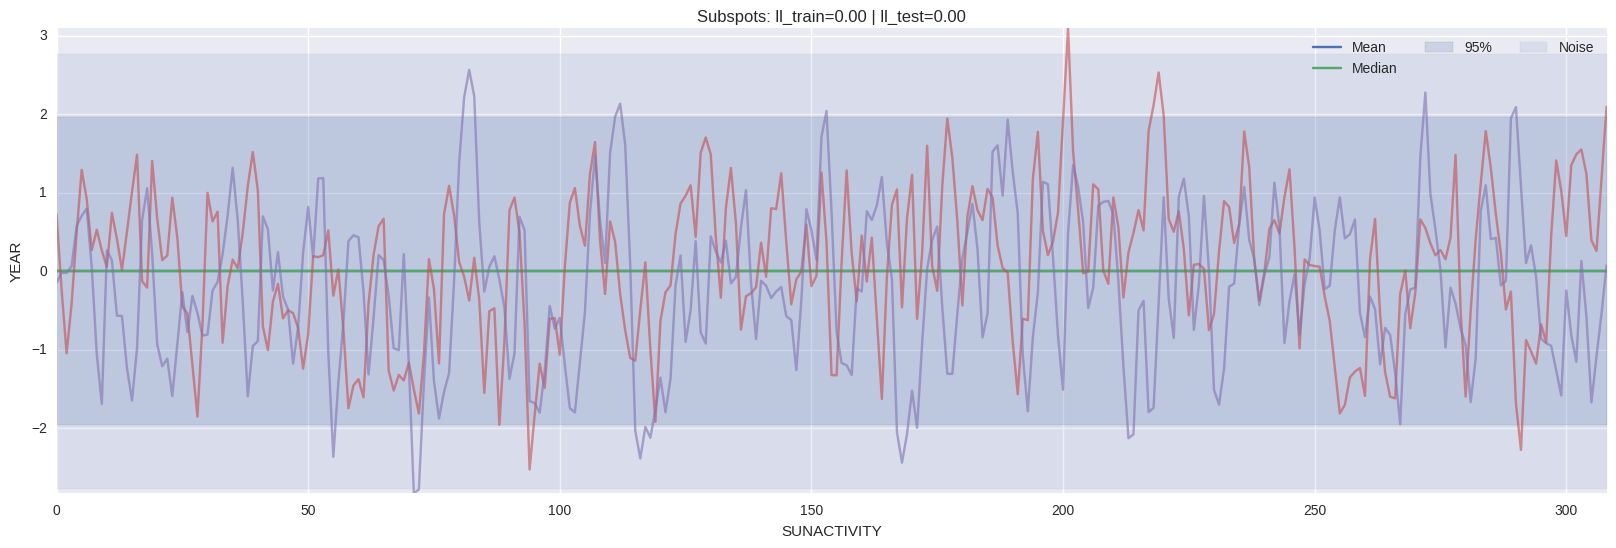

In [48]:
tgp.plot_tgp(tgp.find_default(), samples=2)

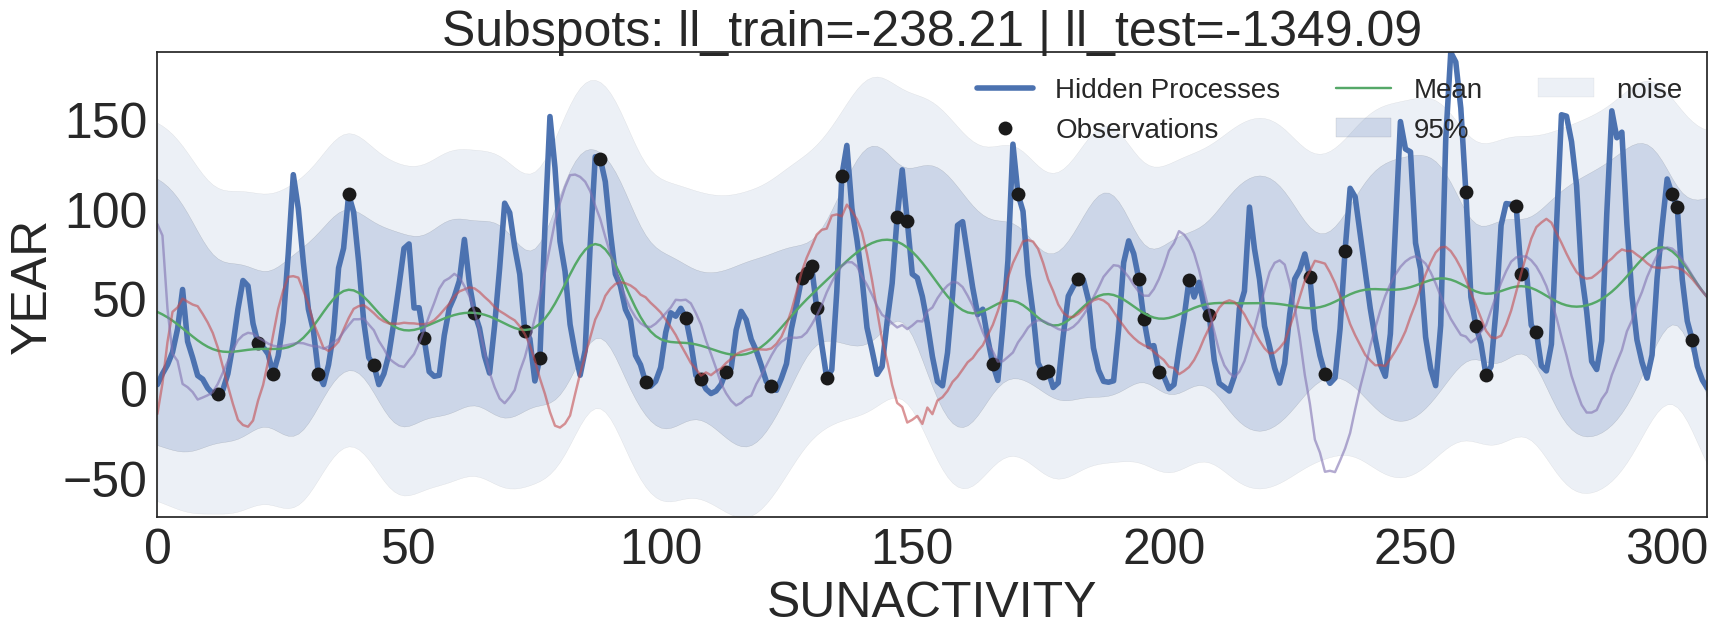

In [19]:
tgp.plot_gp(tgp.find_default(), samples=2)

{'TGP_Bias_Constant': array(53.48366928100586, dtype=float32),
 'TGP_Noise_Var_log_': array(5.613912582397461, dtype=float32),
 'TGP_SE_ARD_L2_Scales_log_': array(-5.805076306335833e+21, dtype=float32),
 'TGP_SE_Var_log_': array(7.372140884399414, dtype=float32)}

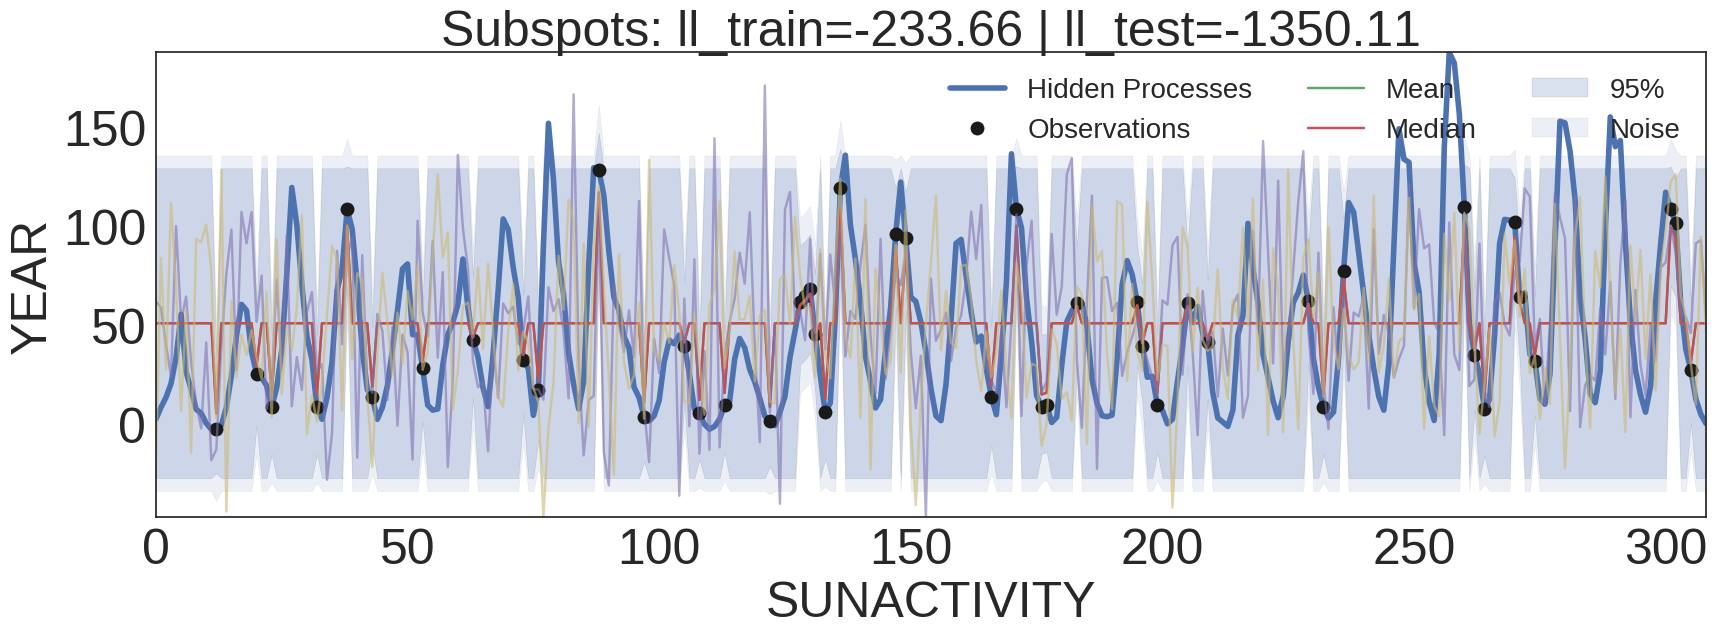

In [13]:
params_break = {'TGP_Bias_Constant': np.array(53.48366928, dtype=np.float32),
 'TGP_Noise_Var_log_': np.array(5.613912582397461, dtype=np.float32),
 'TGP_SE_ARD_L2_Scales_log_': np.array(-5.80507631e+21, dtype=np.float32),
 'TGP_SE_Var_log_': np.array(7.37214088, dtype=np.float32)}
tgp.plot_tgp(params_break, samples=2)
params_break

In [6]:
tgp.widget_params(tgp.find_default())
tgp.distribution.logp(tgp.get_params())

array(-237.72447204589844, dtype=float32)

         Current function value: 235.390717
         Iterations: 46
         Function evaluations: 117
         Gradient evaluations: 105


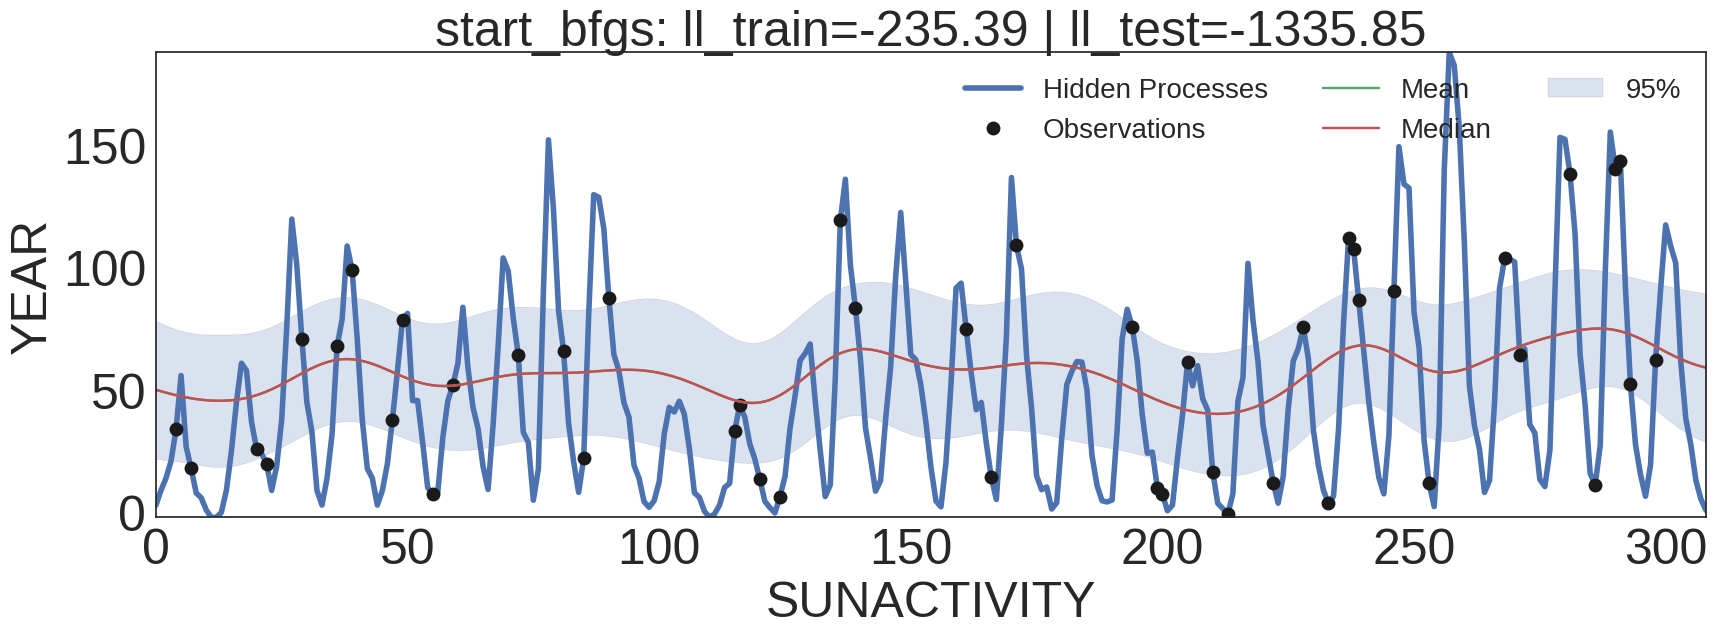

In [7]:
points = tgp.find_MAP(tgp.get_params(), 1, plot=True)

{'TGP_Bias_Constant': array(59.09088897705078, dtype=float32),
 'TGP_Noise_Var_log_': array(7.251310348510742, dtype=float32),
 'TGP_SE_ARD_L2_Scales_log_': array(2.233062267303467, dtype=float32),
 'TGP_SE_Var_log_': array(5.543742656707764, dtype=float32)}

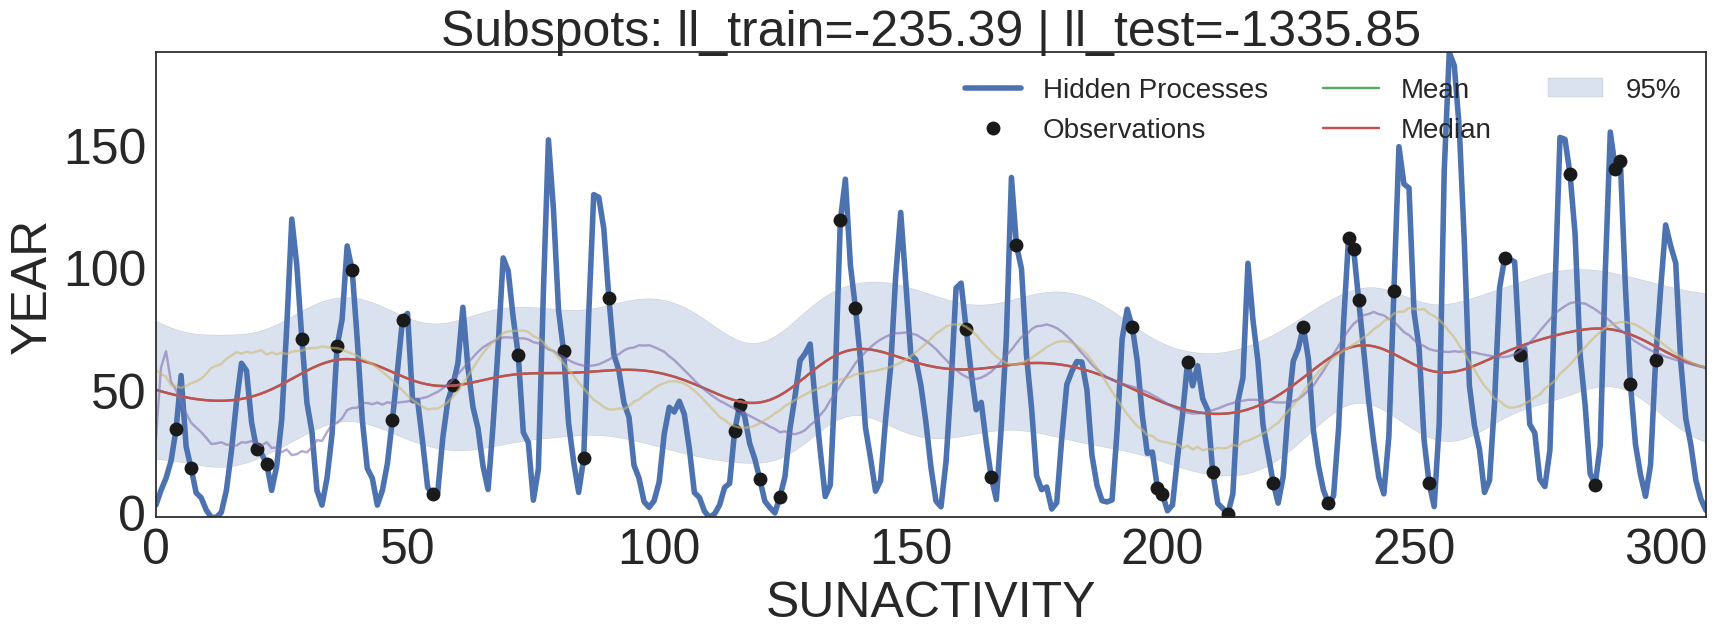

In [8]:
name, logp, params = points[-1]
tgp.plot_tgp(params, samples=2)
params

In [9]:
traces = tgp.sample_hypers(start=tgp.find_default(), samples=10000, advi=False)

100%|██████████| 10000/10000 [06:32<00:00, 25.46it/s]


In [10]:
g3.save_trace(traces)

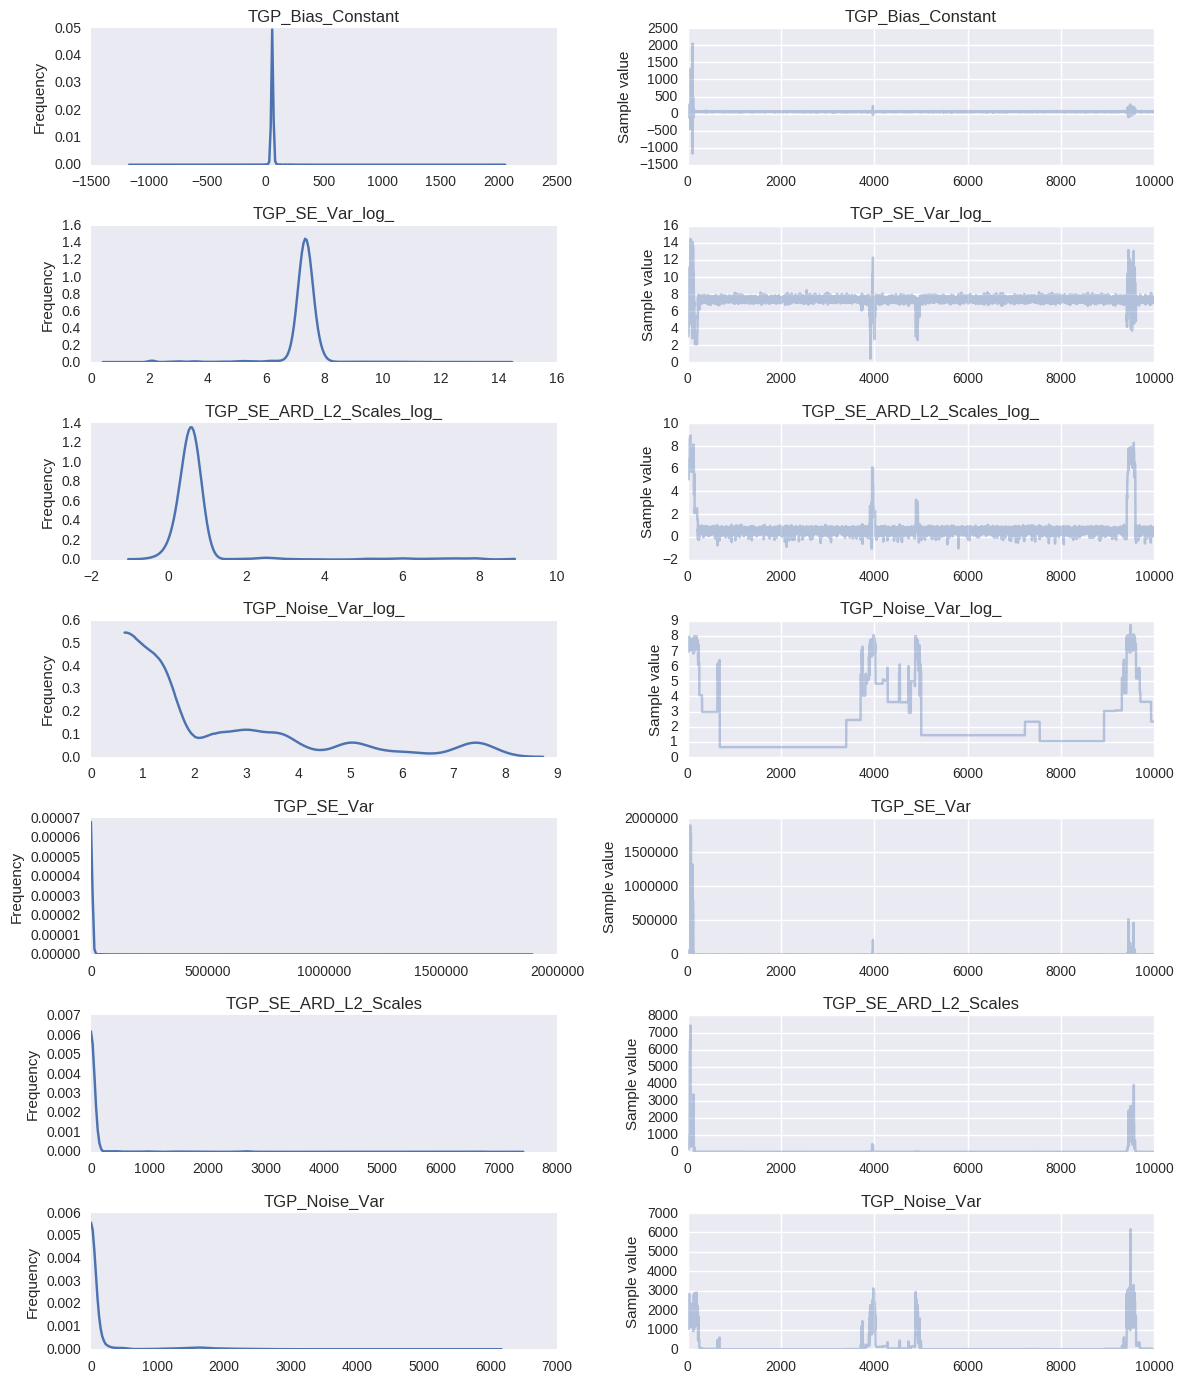

In [11]:
g3.style_seaborn()
g3.traceplot(traces)

In [12]:
datatraces = g3.datatrace(model, traces)
g3.save_datatrace(datatraces)
datatraces.describe().T

count         mean           std          min  \
TGP_SE_ARD_L2_Scales       10000.0    52.823769    394.793091     0.353290   
TGP_SE_Var                 10000.0  3066.476318  36813.167969     1.505900   
TGP_SE_ARD_L2_Scales_log_  10000.0     0.798902      1.204639    -1.040465   
TGP_SE_Var_log_            10000.0     7.276149      0.760099     0.409391   
TGP_Noise_Var_log_         10000.0     2.217661      1.917549     0.649559   
TGP_Bias_Constant          10000.0    57.755608     33.548836 -1171.925415   
TGP_Noise_Var              10000.0   130.850266    425.893738     1.914695   
niter                      10000.0  4999.500000   2886.895680     0.000000   
ll                         10000.0  -230.763793      2.398989  -250.751404   
adll                       10000.0     8.421498      5.076566     0.287760   

                                   25%          50%          75%           max  
TGP_SE_ARD_L2_Scales          1.559022     1.805347     2.060697  7.416587e+03  
TGP_SE_Var                 1298.227539  1533.540039  1807.337769  1.893742e+06  
TGP_SE_ARD_L2_Scales_log_     0.444059     0.590753     0.723044  8.911474e+00  
TGP_SE_Var_log_               7.168755     7.335334     7.499610  1.445407e+01  
TGP_Noise_Var_log_            0.649559     1.437596     3.031591  8.726562e+00  
TGP_Bias_Constant            52.471977    56.943810    61.551339  2.053414e+03  
TGP_Noise_Var                 1.914695     4.210561    20.730183  6.164495e+03  
niter                      2499.750000  4999.500000  7499.250000  9.999000e+03  
ll                         -231.291325  -230.020126  -229.237206 -2.284088e+02  
adll                          5.143149     7.575333    10.530545  6.813752e+01

/home/grios/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


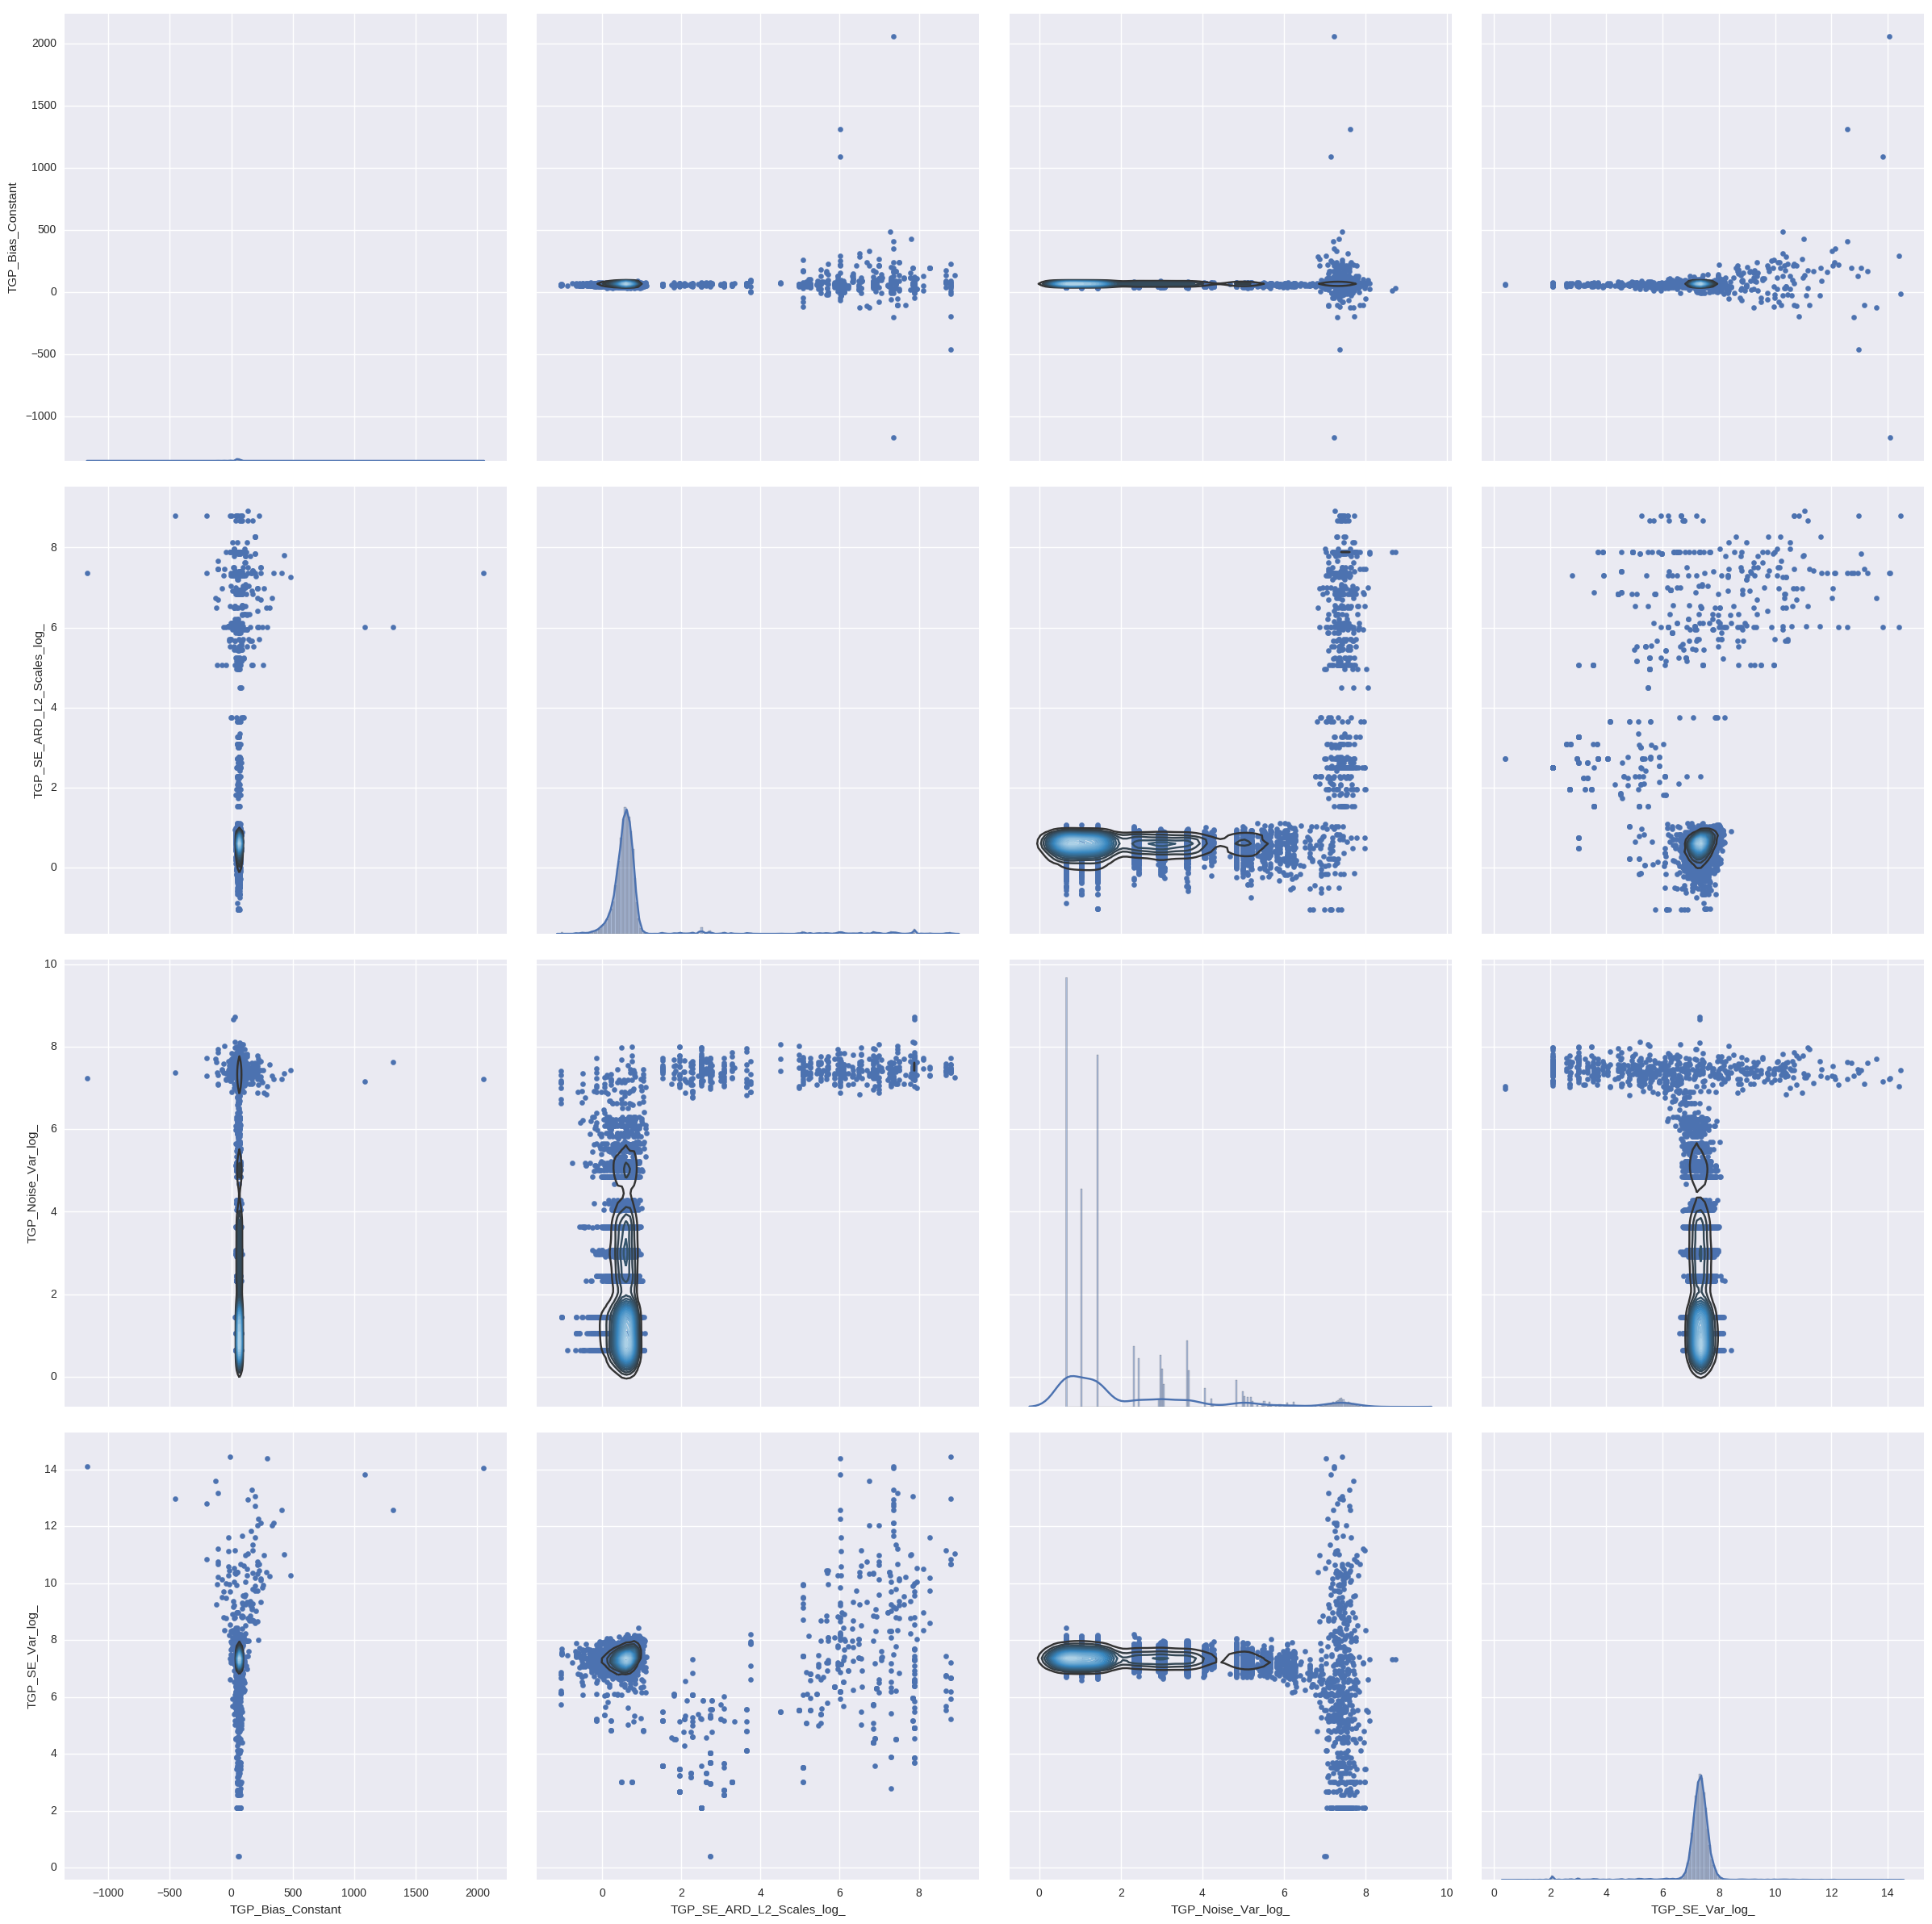

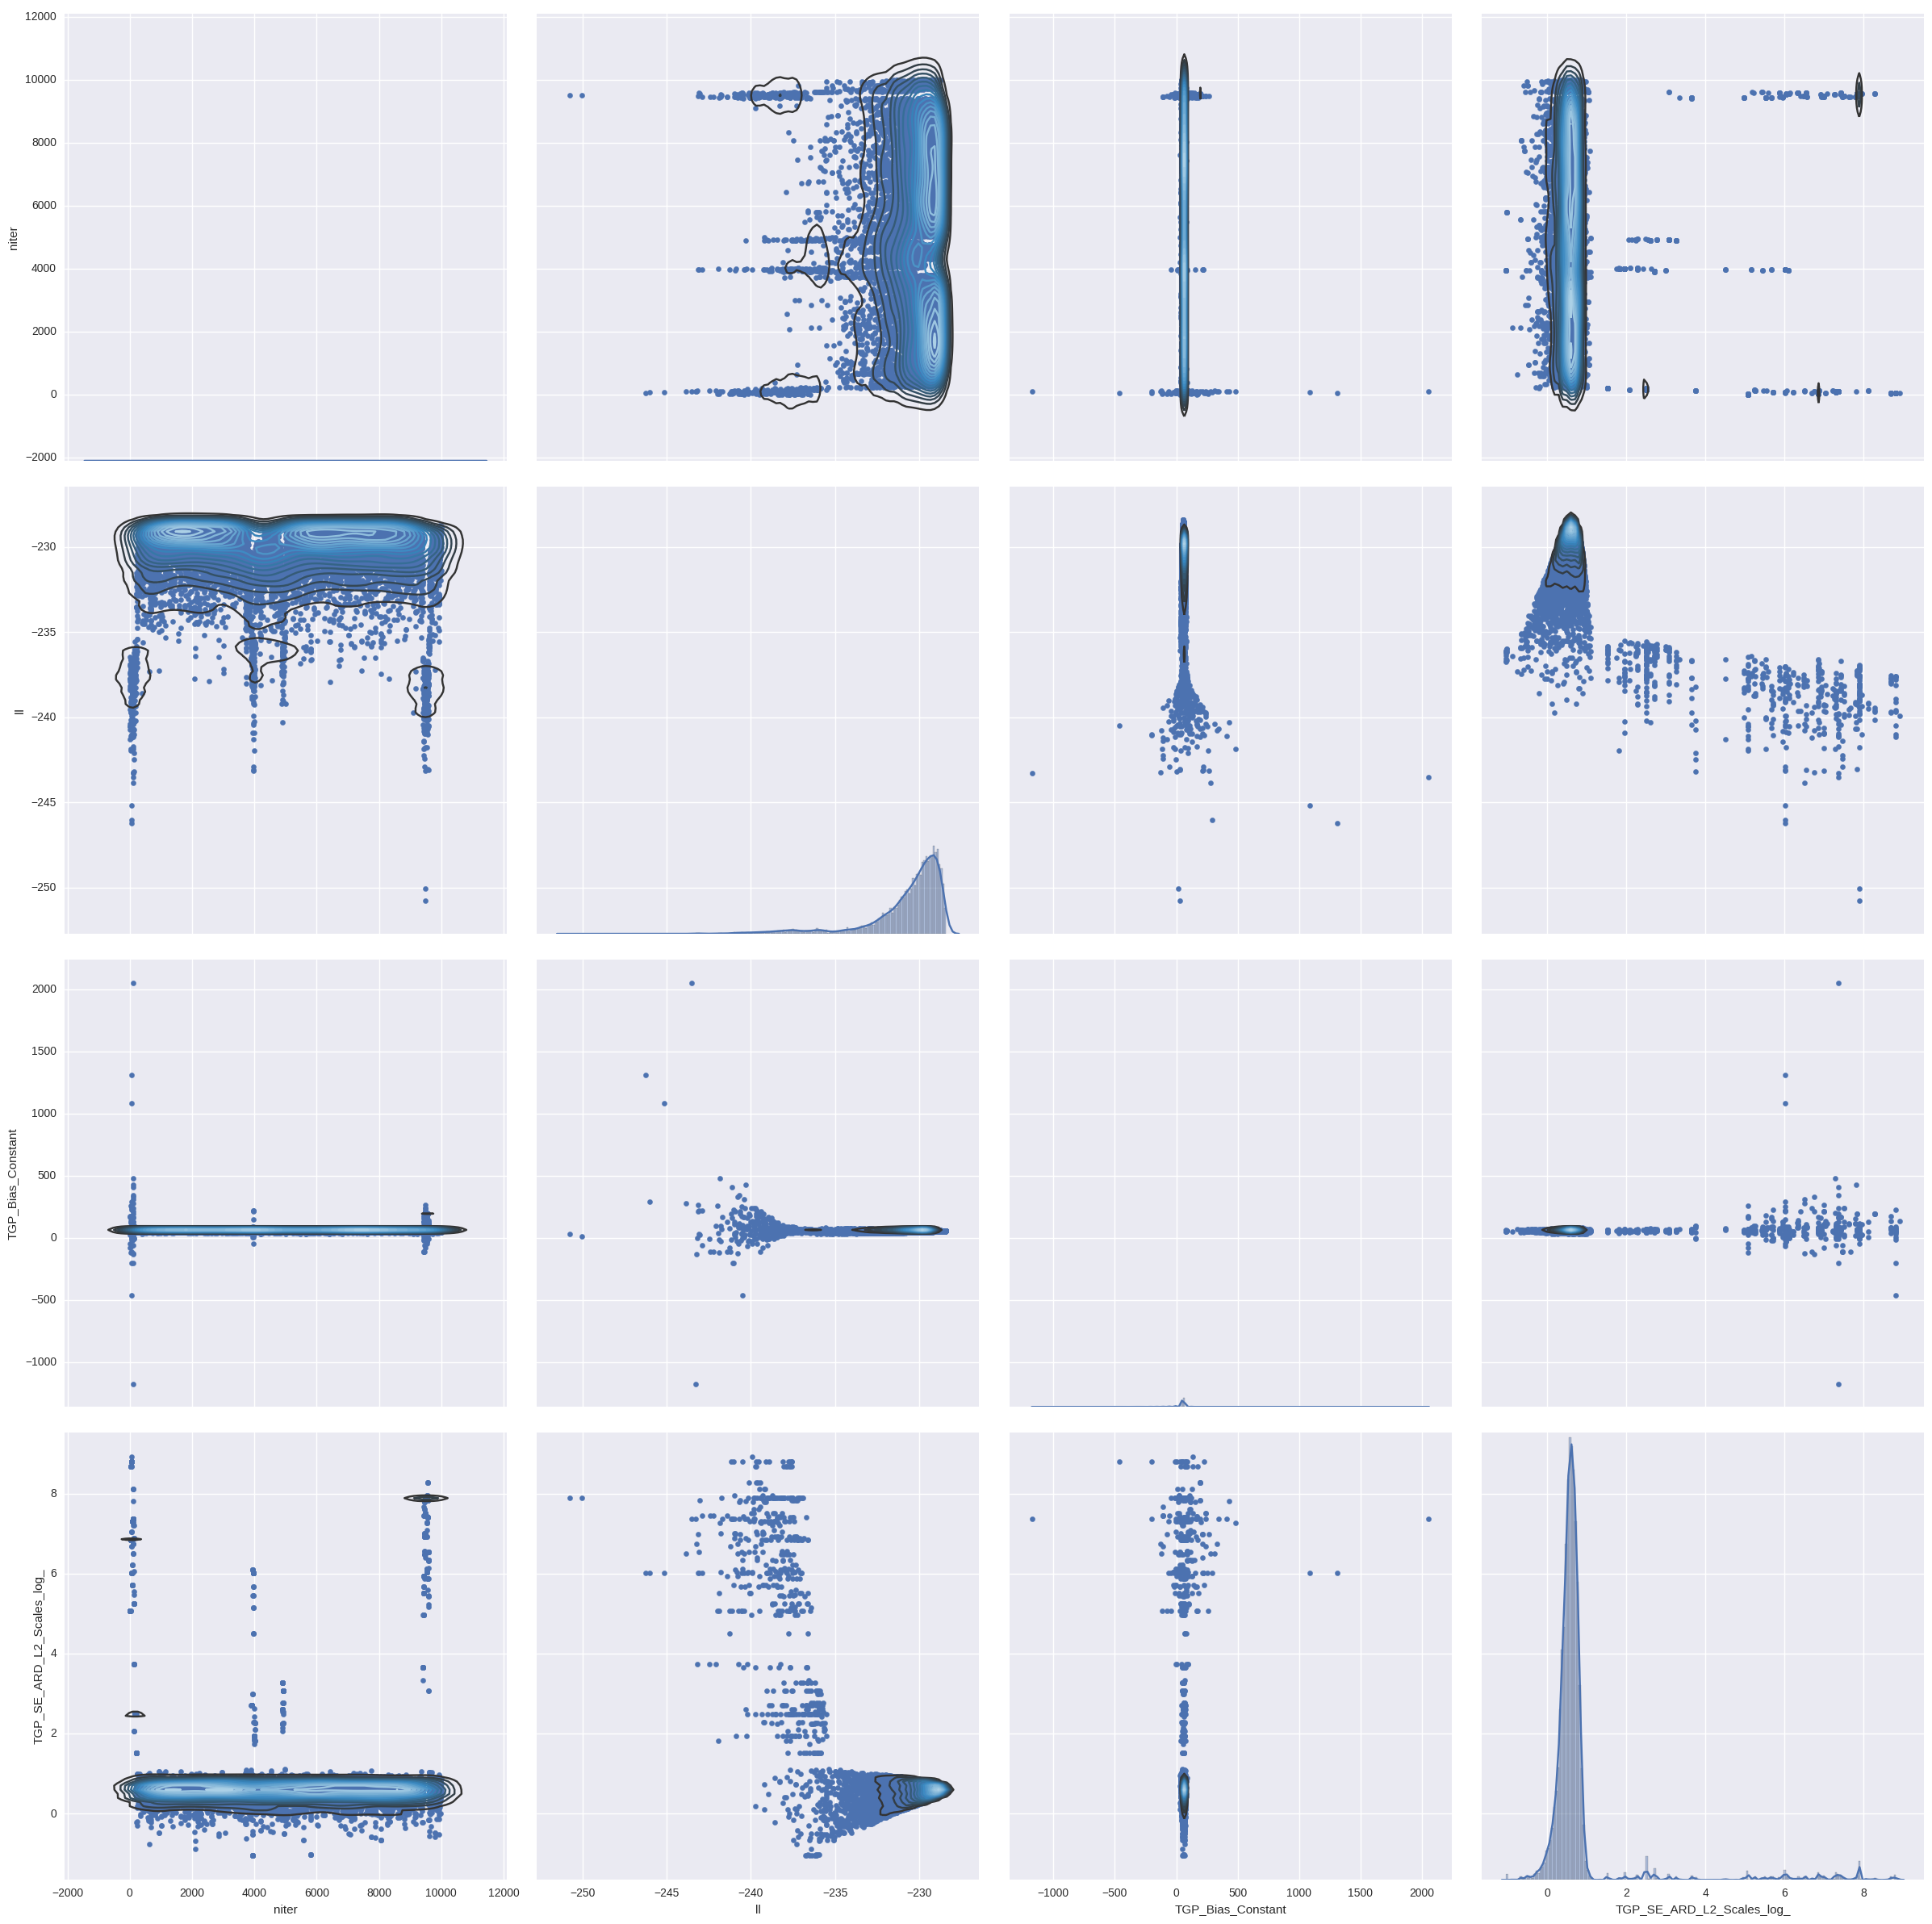

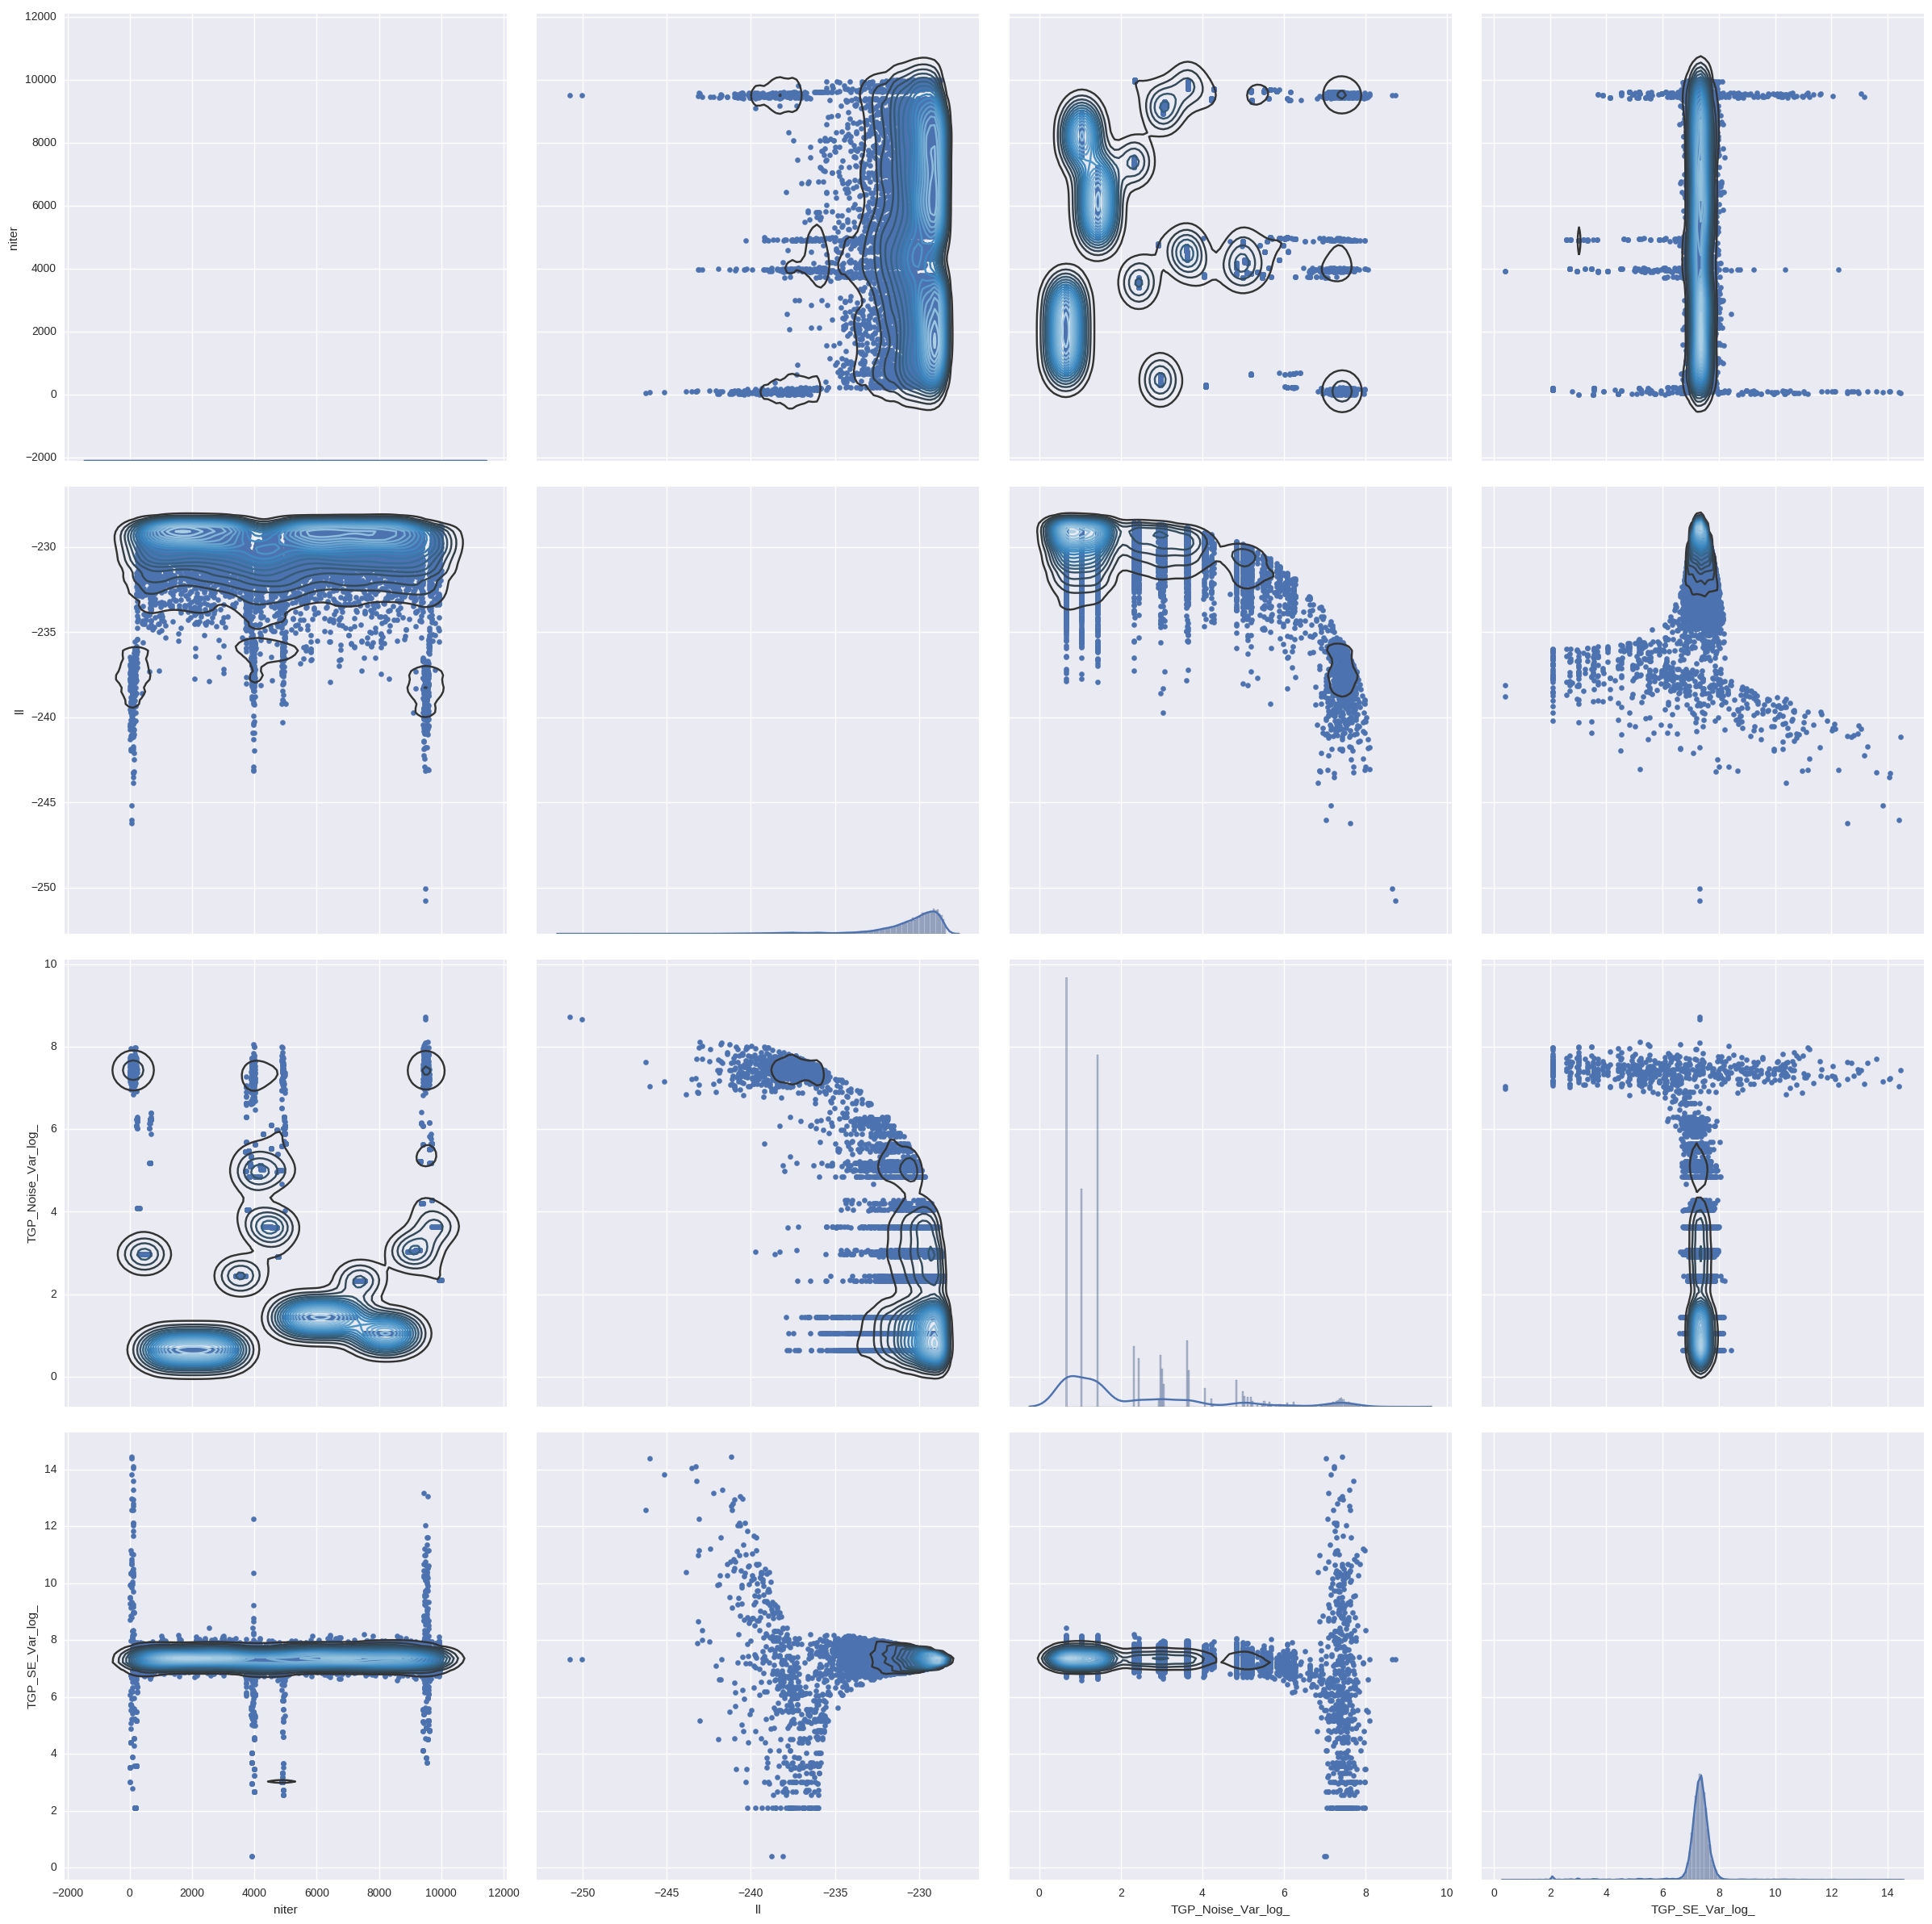

In [13]:
items_ll = ['niter','ll']
items_mt = ['TGP_Bias_Constant','TGP_SE_ARD_L2_Scales_log_']
items_k = ['TGP_Noise_Var_log_','TGP_SE_Var_log_']

g3.plot_datatrace(datatraces,items_mt+items_k)
g3.plot_datatrace(datatraces,items_ll+items_mt)
g3.plot_datatrace(datatraces,items_ll+items_k)

In [14]:
g3.style_seaborn()

/home/grios/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


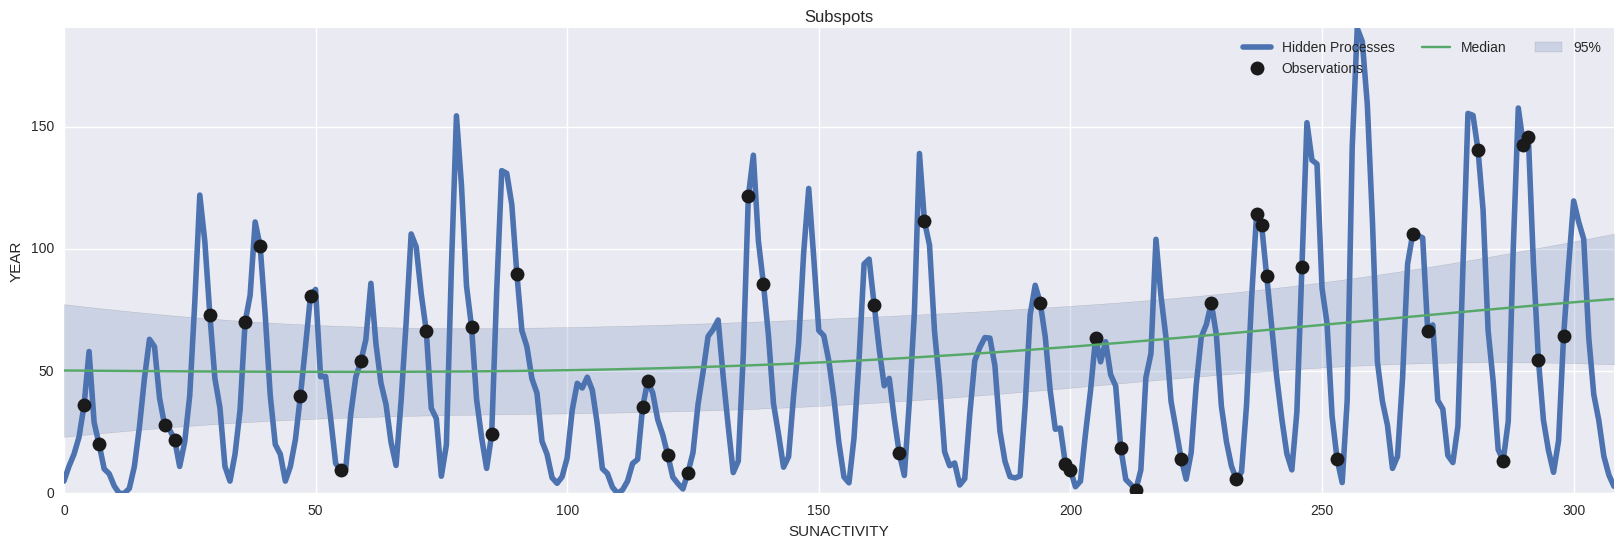

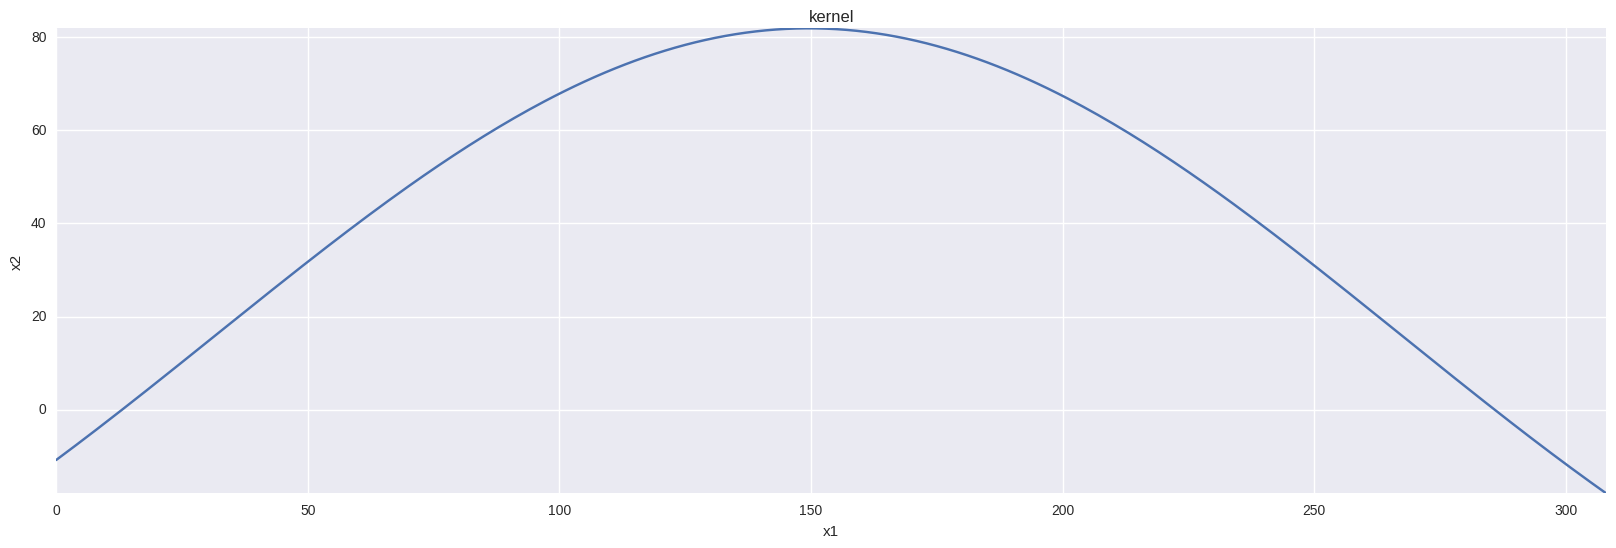

In [15]:
tgp.widget_trace(traces)

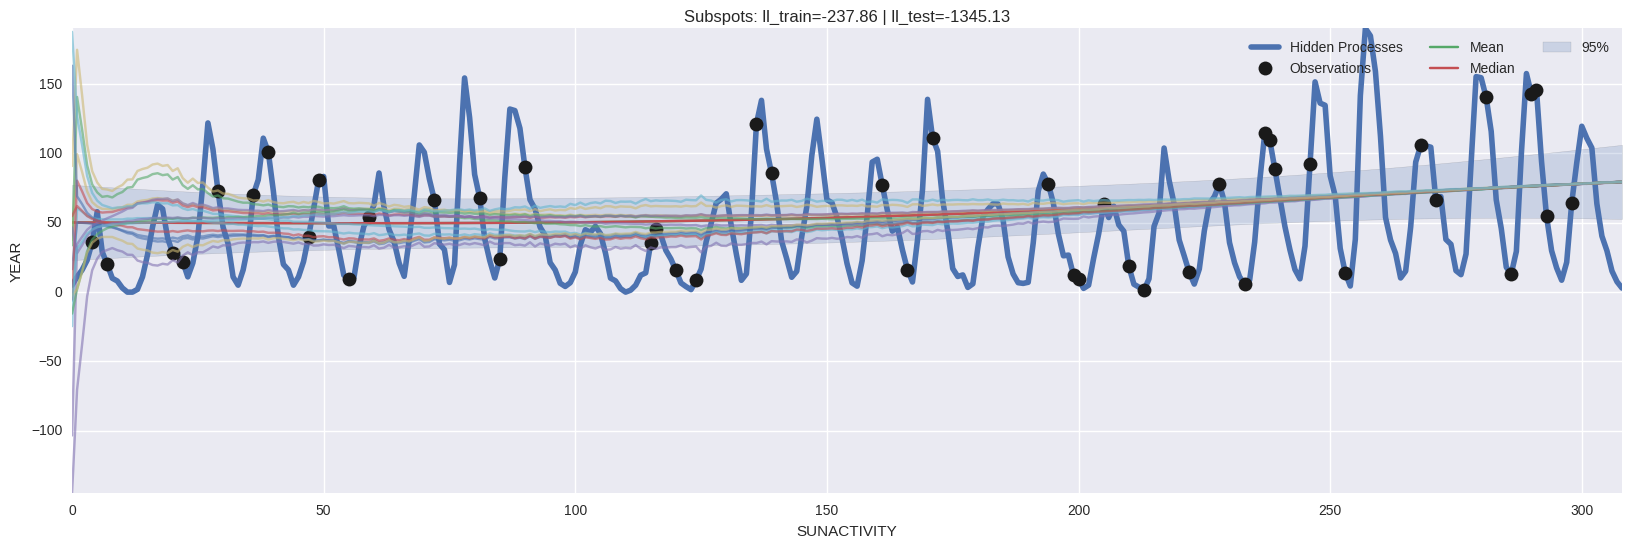

In [16]:
tgp.plot_tgp(tgp.get_params(), samples=15)

In [17]:
traces.varnames.clear()
for v in tgp.model.vars:
    traces.varnames.append(v.name)
traces.varnames

['TGP_Bias_Constant',
 'TGP_SE_Var_log_',
 'TGP_SE_ARD_L2_Scales_log_',
 'TGP_Noise_Var_log_']

In [18]:
with tgp.model:
    ppc = pm.sample_ppc(traces,100,vars=tgp.model.observed_RVs)

  0%|          | 0/100 [00:00<?, ?it/s]

TypeError: point() takes 2 positional arguments but 3 were given

In [ ]:
tgp.plot_tgp(tgp.get_params())

In [ ]:
tgp.plot_gp(tgp.get_params())
_ = g3.plot(ppc['TGP'][:100,:].T, alpha=0.4, zorder=-1)